In [1]:
import sys
import pandas as pd
import urllib.parse
from tqdm import tqdm
import help_functions as hf
from sklearn.model_selection import train_test_split
sys.path.append('../')
from config import FILES_ANNOTATED_PATH
tqdm.pandas()
from PIL import Image 
import PIL
import os
from convert_to_png import convert_to_png
import time
from datetime import date

Using TensorFlow backend.


In [2]:
df = pd.read_json('data/split_data_150623/train_df.json.bz2')
df.head()

,id,title,url,categories,labels
1700644,18214548,Old Friend Accipiter trivirgatus.jpg,/scratch/WIT_Dataset/images/0/0c/Old_Friend_Ac...,"[Accipiter trivirgatus, Accipitridae of Taiwan...","[History, Nature, Culture, Places, STEM]"
2284400,922183,Landsat Aogashima Island.jpg,/scratch/WIT_Dataset/images/6/67/Landsat_Aogas...,"[Landsat images of Japan, Satellite pictures o...","[Places, Technology & Engineering, Culture, Ar..."
2325557,15705776,Anaheim-1879.jpg,/scratch/WIT_Dataset/images/f/f5/Anaheim-1879.jpg,"[History of Anaheim, California, 1879 photogra...","[History, Culture, Society, Transportation]"
1048806,37332127,Men preparing twig frames where silkworms will...,/scratch/WIT_Dataset/images/7/7d/Men_preparing...,"[Sericulture (handscroll by Liang Kai), Spinni...","[Art, Culture]"
2187100,566861,Gray919.png,/scratch/WIT_Dataset/images/5/5f/Gray919.png,"[Gray's Anatomy plates of sensory system, Huma...","[Nature, Culture, Society, People, STEM, Art]"


In [3]:
df_filtered = df[df['url'].str.endswith('.jpg')]

In [5]:
split_data_path = 'data/jpg-data'
os.mkdir(split_data_path)

Train set: 70000 images (70.00%)
Test set:  15000  images (15.00%)
Val set:  7500  images (7.50%)
Thresh set:  7500  images (7.50%)
Found 70000 non-validated image filenames belonging to 28 classes.
Found 15000 non-validated image filenames belonging to 28 classes.
Found 7500 non-validated image filenames belonging to 28 classes.
Found 7500 non-validated image filenames belonging to 28 classes.


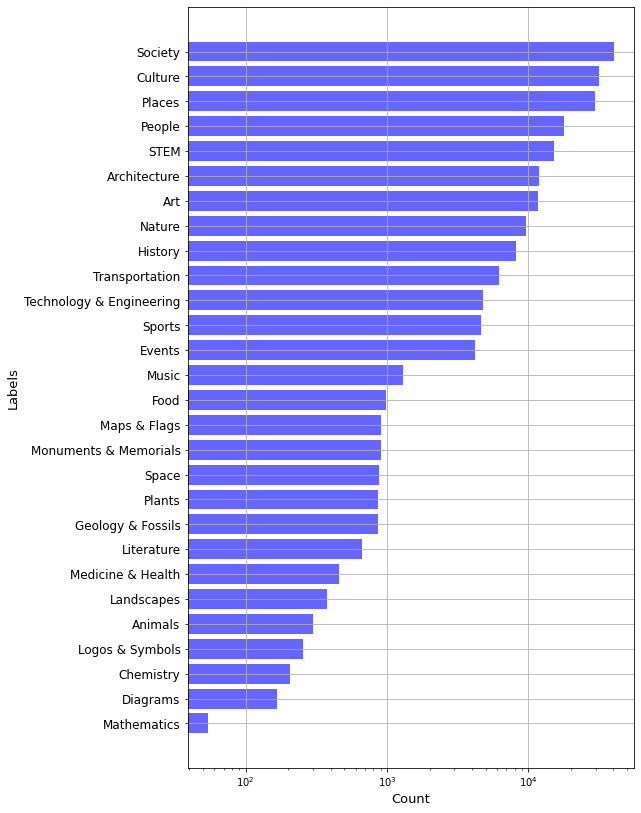

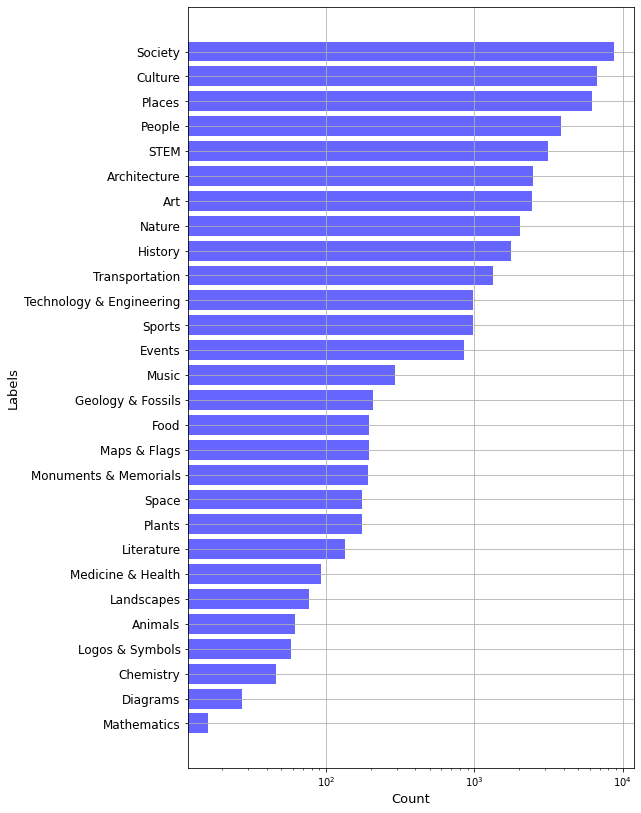

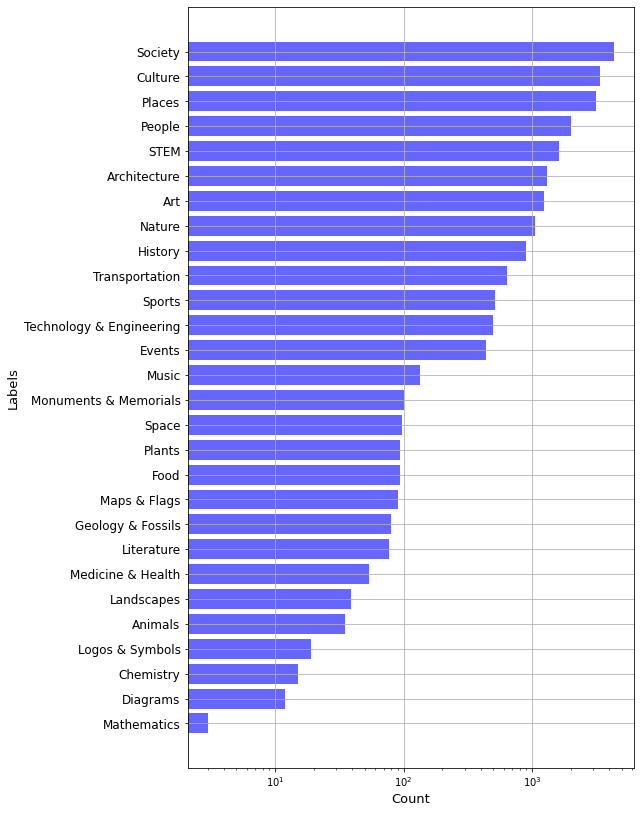

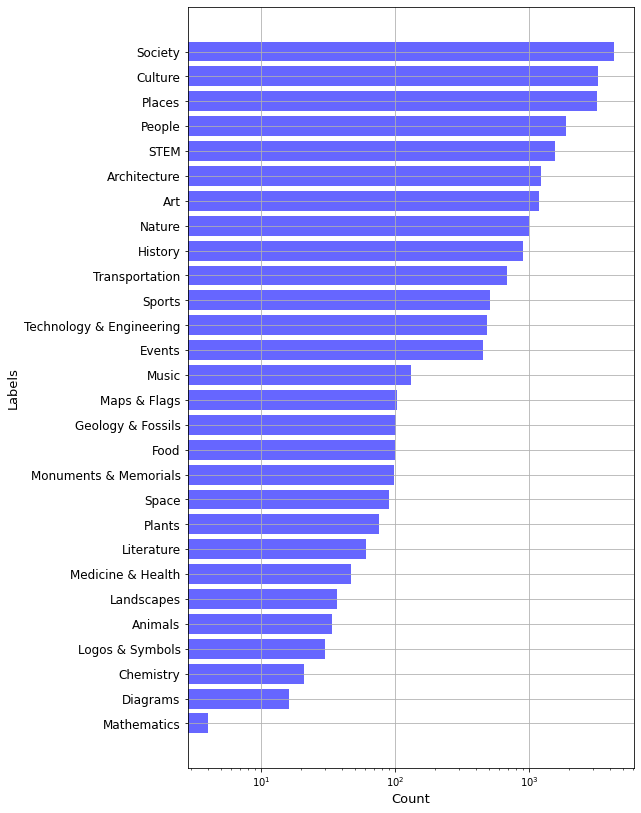

In [6]:
samples = df_filtered.sample(n=100_000)

train_df, rest_df = train_test_split(samples, test_size=0.3, random_state=0)
val_df, test_df = train_test_split(rest_df, test_size=0.5, random_state=0)
val_df, thresh_df = train_test_split(val_df, test_size=0.5, random_state=0)
print(f'Train set: {train_df.shape[0]} images ({100 * train_df.shape[0] / samples.shape[0]:.2f}%)')
print(f'Test set:  {test_df.shape[0]}  images ({100 * test_df.shape[0] / samples.shape[0]:.2f}%)')
print(f'Val set:  {val_df.shape[0]}  images ({100 * val_df.shape[0] / samples.shape[0]:.2f}%)')
print(f'Thresh set:  {val_df.shape[0]}  images ({100 * thresh_df.shape[0] / samples.shape[0]:.2f}%)')

hf.plot_distribution(dataframe=train_df, filename=split_data_path + '/train_distribution.png')
hf.plot_distribution(dataframe=test_df, filename=split_data_path + '/test_distribution.png')
hf.plot_distribution(dataframe=val_df, filename=split_data_path + '/val_distribution.png')
hf.plot_distribution(dataframe=thresh_df, filename=split_data_path + '/thresh_distribution.png')

train_df.to_json(f'{split_data_path}/train_df.json.bz2', compression='bz2')
test_df.to_json(f'{split_data_path}/test_df.json.bz2', compression='bz2')
val_df.to_json(f'{split_data_path}/val_df.json.bz2', compression='bz2')
thresh_df.to_json(f'{split_data_path}/thresh_df.json.bz2', compression='bz2')